In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# sys packages
import os,sys
sys.path.append('..')
from src.utils import *
from src.preprocessing import *
from src.feat_utils import *
from math import pi
# 3rd party packages
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
from windrose import WindroseAxes
from IPython.display import Image
from IPython.core.display import HTML
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import dateutil.parser
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

ModuleNotFoundError: No module named 'src'

In [5]:
datafolder = '../data/'
data_chemai='C:/Users/mlovric/chemai/01_researc/2020_meteo/data'
resdrop="C:/Users/mlovric/chemai/01_researc/2020_meteo/final_pics"

# define data

In [1]:
df=pd.read_excel(data_chemai+'/preprocessed_final_20190126.xlsx')

NameError: name 'pd' is not defined

In [10]:
df.weekdays

2011-01-03       Monday
2011-01-04      Tuesday
2011-01-05    Wednesday
2011-01-06     Thursday
2011-01-07       Friday
2011-01-10       Monday
2011-01-11      Tuesday
2011-01-12    Wednesday
2011-01-13     Thursday
2011-01-14       Friday
2011-01-17       Monday
2011-01-18      Tuesday
2011-01-19    Wednesday
2011-01-20     Thursday
2011-01-21       Friday
2011-01-24       Monday
2011-01-25      Tuesday
2011-01-26    Wednesday
2011-01-27     Thursday
2011-01-28       Friday
2011-01-31       Monday
2011-02-01      Tuesday
2011-02-02    Wednesday
2011-02-03     Thursday
2011-02-04       Friday
2011-02-07       Monday
2011-02-08      Tuesday
2011-02-09    Wednesday
2011-02-10     Thursday
2011-02-11       Friday
                ...    
2013-11-20    Wednesday
2013-11-21     Thursday
2013-11-22       Friday
2013-11-25       Monday
2013-11-26      Tuesday
2013-11-27    Wednesday
2013-11-28     Thursday
2013-11-29       Friday
2013-12-02       Monday
2013-12-03      Tuesday
2013-12-04    We

In [8]:
#select only working days
df=df[df.weekdays.isin(['Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday'])]

In [9]:
df.isnull().sum()

meteo_temp_max                0
meteo_temp_min                0
meteo_temp_mean               1
meteo_temp_max-min            0
meteo_pressure_max            0
meteo_pressure_min            0
meteo_pressure_mean           1
meteo_pressure_max-min        0
meteo_relhum_max              0
meteo_relhum_min              0
meteo_relhum_mean             0
meteo_relhum_max-min          0
meteo_wind_direction          0
meteo_wind_speed              1
meteo_precipitation           0
prtcl_elem_carbon_inPM10     76
prtcl_org_carbon_inPM10      76
prtcl_tot_carbon_inPM10      76
prtcl_sec_org_carbon_inOC    88
prtcl_elem_carbon_unit       76
prtcl_org_carbon_unit        76
prtcl_org_by_elem_carbon     76
prtcl_pm10_unit              76
prtcl_sec_carbon_unit        88
prtcl_tot_carbon_unit        76
no2                          27
weekdays                      0
months                        0
year                          0
season                        0
dtype: int64

In [12]:
df.describe().T['min'][df.describe().T['min']>0].index

Index(['meteo_temp_max-min', 'meteo_pressure_max', 'meteo_pressure_mean',
       'meteo_relhum_max', 'meteo_relhum_min', 'meteo_relhum_mean',
       'prtcl_elem_carbon_inPM10', 'prtcl_org_carbon_inPM10',
       'prtcl_tot_carbon_inPM10', 'prtcl_elem_carbon_unit',
       'prtcl_org_carbon_unit', 'prtcl_org_by_elem_carbon', 'prtcl_pm10_unit',
       'prtcl_tot_carbon_unit', 'no2', 'months', 'year'],
      dtype='object')

In [6]:
df.head(10)

,meteo_temp_max,meteo_temp_min,meteo_temp_mean,meteo_temp_max-min,meteo_pressure_max,meteo_pressure_min,meteo_pressure_mean,meteo_pressure_max-min,meteo_relhum_max,meteo_relhum_min,...,prtcl_org_carbon_unit,prtcl_org_by_elem_carbon,prtcl_pm10_unit,prtcl_sec_carbon_unit,prtcl_tot_carbon_unit,no2,weekdays,months,year,season
2011-01-03,-1.4,-8.4,-3.4,7.0,1009.0,1006.2,1007.5,2.8,99,89,...,12.498482,8.887196,51.218834,10.039526,13.904829,64.991128,Monday,1,2011,winter
2011-01-04,-1.5,-7.1,-2.8,5.6,1008.6,1007.7,1008.1,0.9,90,69,...,8.675886,6.736943,38.338620,6.424193,9.963692,68.858173,Tuesday,1,2011,winter
2011-01-05,-1.7,-3.6,-2.5,1.9,1006.9,1006.3,1006.6,0.6,87,76,...,19.992456,13.642437,66.820248,17.430141,21.457916,74.087994,Wednesday,1,2011,winter
2011-01-06,4.3,-4.6,0.9,8.9,1004.8,1002.3,1003.3,2.5,89,68,...,NaN,NaN,NaN,NaN,NaN,74.087994,Thursday,1,2011,winter
2011-01-07,13.6,2.6,10.9,11.0,1005.6,1003.9,1004.8,1.7,77,65,...,7.747362,4.520958,30.094451,4.751087,9.461017,33.664552,Friday,1,2011,winter
2011-01-10,11.9,3.9,7.4,8.0,1004.8,1004.5,1004.7,0.3,94,80,...,16.864609,6.579598,58.016476,12.382987,19.427778,73.342743,Monday,1,2011,winter
2011-01-11,6.5,3.2,4.0,3.3,1002.0,998.2,999.7,3.8,98,97,...,15.928221,8.949611,55.878269,12.816351,17.707988,32.270468,Tuesday,1,2011,winter
2011-01-12,7.5,0.5,3.0,7.0,1007.1,1001.7,1004.5,5.4,97,80,...,11.147335,4.984269,37.700086,7.236874,13.383838,48.982929,Wednesday,1,2011,winter
2011-01-13,10.5,0.4,6.7,10.1,1002.4,998.7,1000.6,3.7,97,68,...,26.819747,7.091005,74.365067,20.206646,30.601979,67.676399,Thursday,1,2011,winter
2011-01-14,13.1,3.0,6.4,10.1,1002.5,1001.9,1002.2,0.6,97,59,...,31.641013,16.065274,81.292328,28.197351,33.610542,67.685527,Friday,1,2011,winter


In [7]:
#set base colors
colors_p={'EC':'#e6194B','SOC':'#911eb4','POC':'limegreen','PM10':'#4363d8','NO2':'#3cb44b',
        'OC':'#ffe119',}

list(colors_p.values())

['#e6194B', '#911eb4', 'limegreen', '#4363d8', '#3cb44b', '#ffe119']

# analysis
## count days

In [8]:
pd.DataFrame(df[df.prtcl_pm10_unit>=50]['prtcl_pm10_unit'].groupby(df.year).count())

,prtcl_pm10_unit
year,
2011,69
2012,39
2013,43


In [9]:
df.update(df.filter(regex='meteo').fillna(method='ffill'))

## Particles in PM10 for plot

In [10]:
#calculate SEC
df['prtcl_sec_carbon_inPM10']=df['prtcl_sec_carbon_unit']/df['prtcl_pm10_unit']*100

In [11]:
#choose percents
df_percents=df[['prtcl_elem_carbon_inPM10', 'prtcl_org_carbon_inPM10', 'prtcl_tot_carbon_inPM10',
     'prtcl_sec_org_carbon_inOC','prtcl_org_by_elem_carbon','prtcl_sec_carbon_inPM10']]
df_percents.groupby(df.year).mean().T.round(1)

year,2011,2012,2013
prtcl_elem_carbon_inPM10,6.1,6.8,7.9
prtcl_org_carbon_inPM10,23.0,24.9,28.0
prtcl_tot_carbon_inPM10,29.1,31.7,35.9
prtcl_sec_org_carbon_inOC,60.1,56.8,55.3
prtcl_org_by_elem_carbon,5.7,5.3,4.5
prtcl_sec_carbon_inPM10,14.5,14.4,15.6


In [12]:
#EC in Pm10
df_in_pm=df[['prtcl_elem_carbon_inPM10']]
#SOC in Pm10
df_in_pm['prtcl_sec_carbon_inPM10']=df['prtcl_sec_carbon_unit']/df['prtcl_pm10_unit']*100
#POC in Pm10
df_in_pm['prtcl_prim_carbon_inPM10']=df['prtcl_org_carbon_inPM10']-df_in_pm['prtcl_sec_carbon_inPM10']
#other in PM10
df_in_pm['other']=100-df_in_pm.sum(axis=1)

#group for 2 weeks
df_grouped_pm=df_in_pm.resample('2W').mean()
df_grouped_pm.columns

C:\Users\mlovric\AppData\Local\Continuum\anaconda3\envs\chemenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mlovric\AppData\Local\Continuum\anaconda3\envs\chemenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mlovric\AppData\Local\Continuum\anaconda3\envs\chemenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Index(['prtcl_elem_carbon_inPM10', 'prtcl_sec_carbon_inPM10',
       'prtcl_prim_carbon_inPM10', 'other'],
      dtype='object')

##  PCA and others stuff  --> df_degs

In [13]:
#define df num for the needs of PCA
df_num=df.copy()
#needs replace of wind orientation
df_num['meteo_wind_direction_numerical'] = df['meteo_wind_direction'].replace(degs)
df_num=df_num.apply(pd.to_numeric, errors='coerce')
#drop old wind direction
df_num.drop('meteo_wind_direction',axis=1, inplace=True)

## unit bar plot

In [14]:
df_units=df_num[['prtcl_elem_carbon_unit','prtcl_org_carbon_unit','prtcl_pm10_unit','no2']]

In [15]:
custom_sort={'spring':0,'summer':1,'fall':2,'winter':3}

In [16]:
grouped=df_units.groupby(df.season).mean() #group by season
grouped['no_season']=pd.Series(np.array([2,0,1,3]), index=grouped.index)
g_sorted=grouped.sort_values('no_season')
g_sorted

,prtcl_elem_carbon_unit,prtcl_org_carbon_unit,prtcl_pm10_unit,no2,no_season
season,,,,,
spring,1.815413,6.298078,28.992367,53.277162,0
summer,1.443644,4.891189,21.978751,45.210400,1
fall,2.134734,9.384422,36.575292,52.893457,2
winter,2.484606,16.577683,54.830075,58.750687,3


In [17]:
g_sorted.columns=['EC','OC','PM10','NO2','no_season']
g_colors=['#e6194B','#ffe119','#4363d8','#3cb44b']

In [18]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
cm2inch(9,5)

(3.543307086614173, 1.968503937007874)

C:\Users\mlovric\AppData\Local\Continuum\anaconda3\envs\chemenv\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


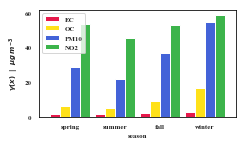

In [19]:
ax=g_sorted.drop('no_season', axis=1).plot(kind='bar',
                                           colors=g_colors,stacked=False,width=.9, figsize=cm2inch(9,5))
ax.legend(bbox_to_anchor=(1.05, 1.05))
for item in ([ax.title,ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(7)
ax.set_ylabel(r'$\gamma(x) \;\; | \;\;\mu g \, m^{-3}$')
ax.grid(False)
#ax.spines['left'].set_position(('outward', 10))
#ax.spines['bottom'].set_position(('outward', 10))
# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0, fontsize=7 )
plt.setp( ax.yaxis.get_majorticklabels(), rotation=0, fontsize=7 )
ax.legend(fontsize=7)
ax.spines['left'].set_edgecolor('black')
ax.spines['bottom'].set_edgecolor('black')
ax.spines['top'].set_edgecolor('black')
ax.spines['right'].set_edgecolor('black')
#plt.savefig(resdrop+'/bar_plot_seasons.png', dpi=300)

##  windplots

In [20]:
#generate df for the windrose story
df_windrose = df.loc[:,['no2','meteo_wind_direction', 'meteo_wind_speed', 'prtcl_pm10_unit','prtcl_elem_carbon_unit', 'prtcl_org_carbon_unit']]
df_windrose['meteo_wind_direction_numerical'] = df_windrose['meteo_wind_direction'].replace(degs)

In [21]:
names_dict

{'meteo_temp_max': 'Temperature max',
 'meteo_temp_min': 'Temperature min',
 'meteo_temp_mean': 'Temperature average',
 'meteo_temp_max-min': 'Temperature max-min',
 'meteo_pressure_max': 'Pressure max',
 'meteo_pressure_min': 'Pressure min',
 'meteo_pressure_mean': 'Pressure average',
 'meteo_pressure_max-min': 'Pressure max-min',
 'meteo_relhum_max': 'Relative humidity max',
 'meteo_relhum_min': 'Relative humidity min',
 'meteo_relhum_mean': 'Relative humidity average',
 'meteo_relhum_max-min': 'Relative humidity max-min',
 'meteo_wind_speed': 'Wind speed',
 'meteo_precipitation': 'Precipitation',
 'prtcl_elem_carbon_inPM10': 'EC/PM10',
 'prtcl_org_carbon_inPM10': 'OC/PM10',
 'prtcl_tot_carbon_inPM10': 'TOC/PM10',
 'prtcl_prim_carbon_unit': 'POC',
 'prtcl_sec_org_carbon_inOC': 'SOC/OC',
 'prtcl_elem_carbon_unit': 'EC ug/m3',
 'prtcl_org_carbon_unit': 'OC ug/m3',
 'prtcl_org_by_elem_carbon': 'OC/EC',
 'prtcl_pm10_unit': 'PM10 ug/m3',
 'prtcl_sec_carbon_unit': 'SOC ug/m3',
 'prtcl_tot_

In [22]:
prt_season={'prtcl_elem_carbon_unit':'winter',
'prtcl_org_carbon_unit':'summer',
'no2':'fall',
'prtcl_pm10_unit':'spring'}
col_season={'prtcl_elem_carbon_unit':cm.autumn,
'prtcl_org_carbon_unit':cm.Wistia,
'no2':cm.summer,
'prtcl_pm10_unit':cm.winter}

plot EC ug/m3   - broj mjerenja 192 


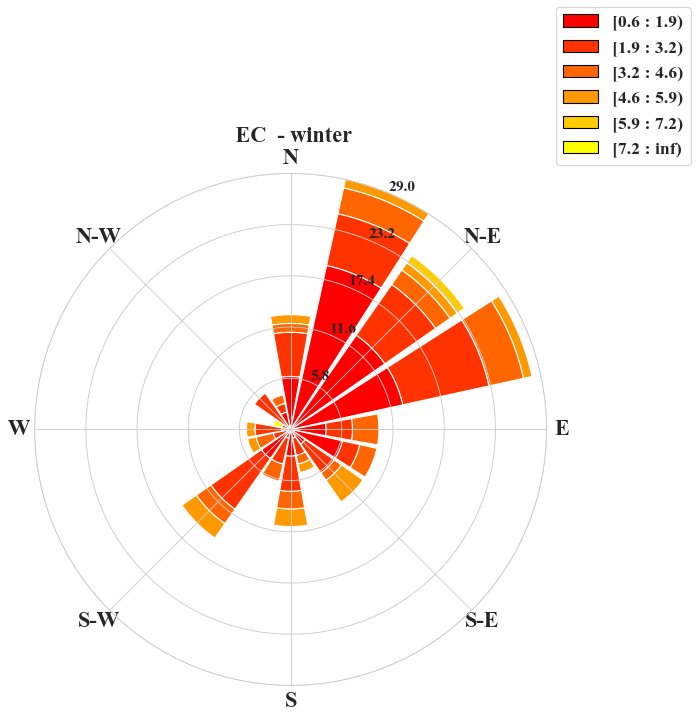

plot OC ug/m3   - broj mjerenja 197 


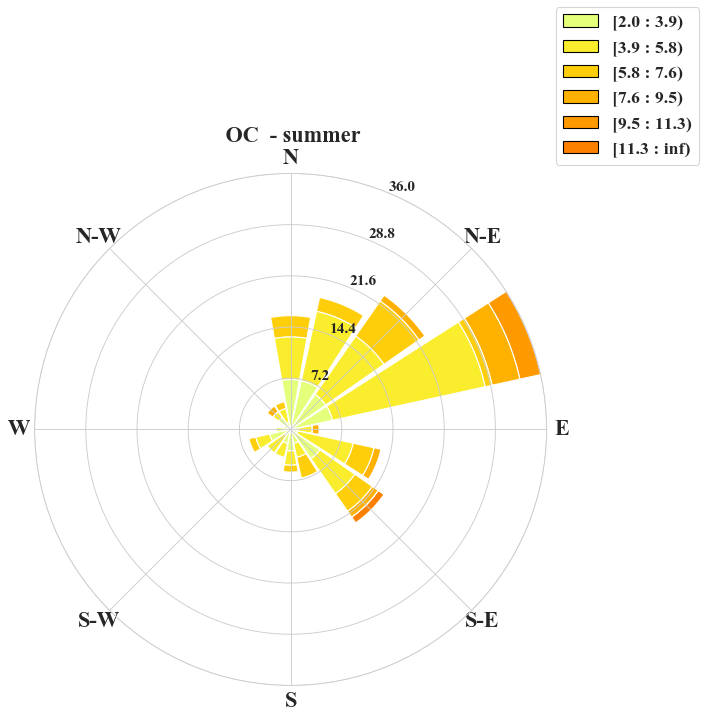

plot NO2 ug/m3   - broj mjerenja 195 


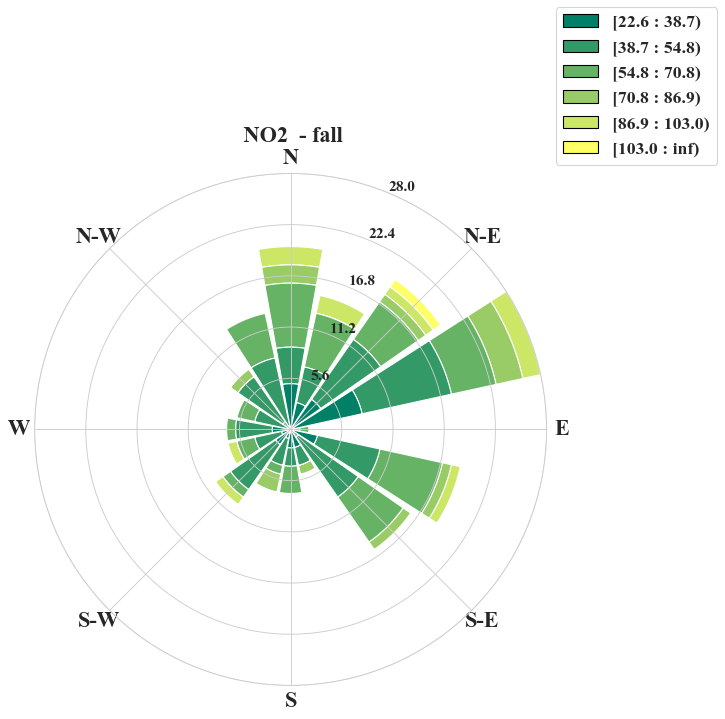

plot PM10 ug/m3   - broj mjerenja 198 


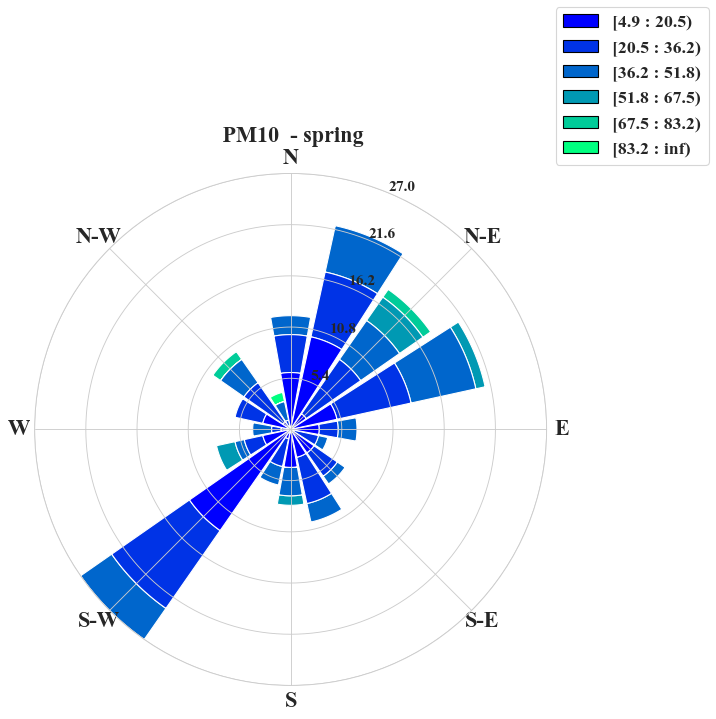

In [26]:
for i,x in enumerate(['prtcl_elem_carbon_unit', 'prtcl_org_carbon_unit', 'no2','prtcl_pm10_unit']):
    #for season in df.season.unique():
        print('plot %s '%names_dict[x],' - broj mjerenja %s ' %df_windrose.meteo_wind_direction_numerical[df.season==prt_season[x]].count())
        plt.rcParams.update({'font.size': 14})
        ax = WindroseAxes.from_ax()
        
        ax.bar(df_windrose.meteo_wind_direction_numerical[df.season==prt_season[x]],
                df_windrose[x][df.season==prt_season[x]],
                cmap=col_season[x],
                normed=False,
                opening=.9,
                edgecolor='white')
        ax.legend(bbox_to_anchor=(1.0, 1.0),fontsize=16)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=20)
        plt.rc('font', family='Times New Roman', weight='bold', size=20)
        ax.set_title(' %s - %s'  %(names_dict[x][:-5],prt_season[x]), fontsize=20);
        
        plt.savefig(resdrop+'/fig4_%s_v3_font'  %i, dpi=300,bbox_inches="tight")

        plt.show()
        #break


### choice variables

In [25]:
temp_df=df.filter(regex='temp')
temp_df.std().round(1).sort_values(ascending=False)

meteo_temp_max        10.3
meteo_temp_mean        9.0
meteo_temp_min         7.9
meteo_temp_max-min     4.7
dtype: float64

In [26]:
df['prtcl_tot_carbon_unit']=df[['prtcl_elem_carbon_unit', 'prtcl_org_carbon_unit',
             'prtcl_sec_carbon_unit']].sum(axis=1)

# PCA

In [27]:
ch_names=dict(zip(list_old, list_new))
ch_names

{'meteo_temp_max': 'T+',
 'meteo_temp_min': 'T-',
 'meteo_temp_mean': 'T^',
 'meteo_temp_max-min': 'Td',
 'meteo_pressure_max': 'P+',
 'meteo_pressure_min': 'P-',
 'meteo_pressure_mean': 'P^',
 'meteo_pressure_max-min': 'Pd',
 'meteo_relhum_max': 'RH+',
 'meteo_relhum_min': 'RH-',
 'meteo_relhum_mean': 'RH^',
 'meteo_relhum_max-min': 'RHd',
 'meteo_wind_speed': 'WS',
 'meteo_precipitation': 'Pr',
 'prtcl_elem_carbon_unit': 'EC',
 'prtcl_org_carbon_unit': 'OC',
 'prtcl_pm10_unit': 'PM10',
 'prtcl_sec_carbon_unit': 'SC',
 'prtcl_tot_carbon_unit': 'TC',
 'no2': 'NO2',
 'prtcl_elem_carbon_inPM10': '%EC',
 'prtcl_org_carbon_inPM10': '%OC',
 'prtcl_tot_carbon_inPM10': '%TC',
 'prtcl_sec_org_carbon_inOC': 'SC/OC',
 'prtcl_org_by_elem_carbon': 'OC/EC'}

# adjust the weekend dates to fall on the friday

In [29]:
num_list=['meteo_temp_mean', 'meteo_pressure_mean', 'meteo_relhum_mean',
          'meteo_precipitation','prtcl_elem_carbon_unit',
          'prtcl_org_carbon_unit', 'prtcl_pm10_unit',
       'prtcl_sec_carbon_unit', 'no2']

In [30]:
data_org=df_num[num_list].rename(columns=names_dict)

In [31]:
data_org.columns.tolist()

['Temperature average',
 'Pressure average',
 'Relative humidity average',
 'Precipitation',
 'EC ug/m3',
 'OC ug/m3',
 'PM10 ug/m3',
 'SOC ug/m3',
 'NO2 ug/m3']

In [32]:
data_org=data_org.apply(pd.to_numeric, errors='coerce')
data_org.columns

Index(['Temperature average', 'Pressure average', 'Relative humidity average',
       'Precipitation', 'EC ug/m3', 'OC ug/m3', 'PM10 ug/m3', 'SOC ug/m3',
       'NO2 ug/m3'],
      dtype='object')

In [33]:
c_pca={'PC1': '#911eb4',
 'PC2': '#4363d8',
 'PC3': '#e6194B',
 'PC4': '#3cb44b'}

In [34]:
def minmax(X):
    if type(X)==pd.DataFrame:
        array_s=MinMaxScaler().fit_transform(X)
        Xs=pd.DataFrame(array_s, index=X.index, columns=X.columns)
        return Xs
    elif type(X)==pd.Series:
        array_s = MinMaxScaler().fit_transform(np.array(X).reshape(-1, 1))
        Xs = pd.Series(np.squeeze(array_s), index=X.index, name=X.name)
        return Xs
    else:
        print('error')

C:\Users\mlovric\AppData\Local\Continuum\anaconda3\envs\chemenv\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


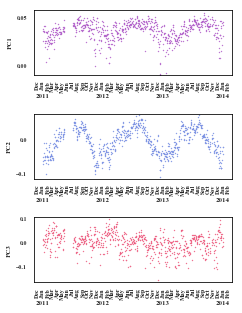

In [35]:
pca_t=data_org.dropna(how='any')
t_scaled=minmax(pca_t)
pcaF_ = PCA(n_components=3).fit(t_scaled.T) #10 at first
pcaF_comp=pd.DataFrame(pcaF_.components_.T, index=pca_t.index, columns=['PC1','PC2','PC3'])




#pcaF_comp.plot(ax=ax, linestyle='None', marker='.',figsize=(20,20),subplots=True)



import matplotlib.dates as mdates
years = mdates.YearLocator(1)
months = mdates.MonthLocator(interval=1)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y') 

fig, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(3.55,5))
plt.subplots_adjust(hspace=.6)
axx = plt.gca()
#fig.tight_layout()


for i,x in enumerate(['PC1','PC2','PC3']):
    ax=[ax1,ax2,ax3][i]

    c=['orange','r','b','g'][i]
    res=pcaF_comp[x]
    
    ax.plot(res.index, res.values, ms=2, label=x, lw=.5, c=c_pca[x], linestyle='None', marker='.',
           markeredgewidth=.3, markerfacecolor='w')
    ax.set_ylim(min(res)*1.05,max(res)*1.05)
    #ax.legend(bbox_to_anchor=(1.3, 1.05))
    #set locator
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(monthsFmt)
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    #set spines
    plt.setp(ax.yaxis.get_majorticklabels(), fontsize=6)
    ax.yaxis.set_label_text(x, fontsize=7)

    ax.spines['top'].set_edgecolor('black')
    ax.spines['right'].set_edgecolor('black')
    ax.spines['left'].set_edgecolor('black')
    ax.spines['bottom'].set_edgecolor('black')
    ax.grid(False)

    plt.setp(ax.xaxis.get_minorticklabels(), rotation=90, fontsize=6)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=7)
#plt.suptitle('Principal', fontsize=32)



plt.savefig(resdrop+'/fig7_pca_500dpi.png', dpi=500)
plt.show()

In [36]:
np.cumsum(pcaF_.explained_variance_ratio_)*100

array([65.85661342, 82.69660801, 90.93084795])

In [37]:
t_scaled=minmax(pca_t)
pcaF_ = PCA(n_components=4).fit(t_scaled)
pd.DataFrame(pcaF_.components_, columns=pca_t.columns).round(2).T#.to_excel(resdrop+'/pca_3.xlsx')

C:\Users\mlovric\AppData\Local\Continuum\anaconda3\envs\chemenv\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3
Temperature average,-0.53,-0.12,0.42,0.16
Pressure average,0.19,-0.56,-0.53,-0.35
Relative humidity average,0.48,0.65,-0.03,-0.19
Precipitation,-0.01,0.29,0.09,0.01
EC ug/m3,0.22,-0.20,0.57,-0.57
OC ug/m3,0.39,-0.19,0.22,0.32
PM10 ug/m3,0.34,-0.22,0.16,0.29
SOC ug/m3,0.36,-0.16,0.11,0.49
NO2 ug/m3,0.11,-0.13,0.36,-0.27


### correlation

In [35]:
m3=r'$\;\mu g \, m^{-3}$'
        
data_org.columns=['Temperature average', 'Pressure average', 'Relative humidity average',
       'Precipitation', 'EC '+m3, 'OC '+m3, 'PM10 '+m3, 'SOC '+m3 ,
       'NO2 '+m3]
#data_org.columns=['Temperature average', 'Pressure average', 'Relative humidity average','Precipitation', 'EC ', 'OC ', 'PM10 ', 'SOC ' ,'NO2 ']
data_org.head()

,Temperature average,Pressure average,Relative humidity average,Precipitation,"EC $\;\mu g \, m^{-3}$","OC $\;\mu g \, m^{-3}$","PM10 $\;\mu g \, m^{-3}$","SOC $\;\mu g \, m^{-3}$","NO2 $\;\mu g \, m^{-3}$"
2011-01-03,-3.4,1007.5,95,0.0,1.406347,12.498482,51.218834,10.039526,64.991128
2011-01-04,-2.8,1008.1,81,0.0,1.287808,8.675886,38.338620,6.424193,68.858173
2011-01-05,-2.5,1006.6,83,0.0,1.465461,19.992456,66.820248,17.430141,74.087994
2011-01-06,0.9,1003.3,81,0.0,NaN,NaN,NaN,NaN,74.087994
2011-01-07,10.9,1004.8,72,0.0,1.713655,7.747362,30.094451,4.751087,33.664552


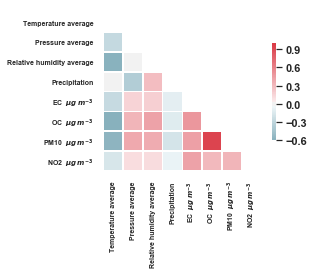

In [37]:
for x,i in enumerate([data_org.drop(['SOC '+m3],1)]):#data_avg, data_all, data_mm, data_prtc

    fig, ax=plt.subplots(figsize=(3.55,3.55),facecolor='white')
    corr=i.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio

    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    sns.set(font_scale=1)
    ax.set_facecolor('white')
    for item in ([ax.title,ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(7)
    




    plt.savefig(resdrop+'/fig5_correlation_300dpi.png',dpi=300,bbox_inches="tight")

In [40]:
def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sort_by_month = sort_pd(key=months.index)

In [41]:
prtcls={
'prtcl_elem_carbon_unit':r'$\gamma \; (EC)\quad \mu g \, m^{-3}$',
'prtcl_org_carbon_unit':r'$\gamma \; (OC)\quad \mu g \, m^{-3}$',
'no2':r'$\gamma \; (NO_2)\quad \mu g \, m^{-3}$',
}

In [42]:
colors={'prtcl_sec_carbon_unit':'#911eb4','prtcl_pm10_unit':'#4363d8',
        'prtcl_elem_carbon_unit':'#e6194B','no2':'#3cb44b','prtcl_org_carbon_unit':'gold',
        'prtcl_prim_carbon_unit':'#f032e6'}


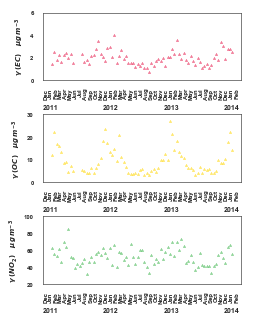

In [64]:
import matplotlib.dates as mdates
years = mdates.YearLocator(1)
months = mdates.MonthLocator(interval=1)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y') 

fig, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(3.55,5))
axx = plt.gca()
plt.subplots_adjust(hspace=.5)


for i,x in enumerate(['prtcl_elem_carbon_unit','prtcl_org_carbon_unit','no2']):
    ax=[ax1,ax2,ax3][i]

    c=['orange','r','b','g'][i]
    res=df[x].resample('2W').mean()
    ax.plot(res.index, res.values,label=x, ms=2, lw=1, c=colors[x], linestyle='None', marker='^',
           markeredgewidth=.5, markerfacecolor='w')
    ax.set_ylim(min(res)*1.05,max(res)*1.05)
    #ax.legend(bbox_to_anchor=(1.3, 1.05))
    #set locator
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(monthsFmt)
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    #set spines
    plt.setp(ax.yaxis.get_majorticklabels(), fontsize=6)
    ax.yaxis.set_label_text(prtcls[x], fontsize=7)
    
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=90, fontsize=6)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=7)
    
    ax.spines['top'].set_edgecolor('black')
    ax.spines['top'].set_linewidth(.5)
    ax.spines['right'].set_edgecolor('black')
    ax.spines['right'].set_linewidth(.5)
    ax.spines['left'].set_edgecolor('black')
    ax.spines['left'].set_linewidth(.5)
    ax.spines['bottom'].set_edgecolor('black')
    ax.spines['bottom'].set_linewidth(.5)
    ax.set_yticks(ax.get_yticks())
    ax.set_facecolor('white')
    

    ax.grid(True)
    

plt.savefig(resdrop+'/fig3_timeseries_500dpi.png', dpi=500)
plt.show()

In [65]:
plt.rcParams['axes.facecolor'] = 'white'

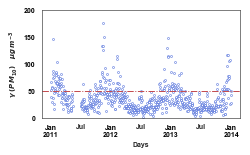

In [71]:
fig, ax = plt.subplots()
ax=df['prtcl_pm10_unit'].plot(figsize=(3.55,2), linestyle='None', c='#4363d8',marker='o',
                              markeredgewidth=.5, markeredgecolor='#4363d8', markerfacecolor='w', markersize=2, fontsize=7)
ax.axhline(y=50,linestyle='-.', linewidth=1, c='r')
#plt.title('PM10', fontsize=32)
#ax.spines['left'].set_position(('outward', 10))
#ax.spines['bottom'].set_position(('outward', 10))
# Hide the right and top spines

ax.set_ylim(0,200)

ax.tick_params(axis = 'both', colors='black', direction='inout', which = 'major', labelsize = 7)
ax.tick_params(axis = 'both',direction='inout',  which = 'minor', labelsize = 7)
ax.grid(False)
plt.ylabel(r'$\gamma \; (PM_{10})\quad \mu g \, m^{-3}$', fontsize=7)
plt.xlabel('Days', fontsize=7)

ax.spines['top'].set_edgecolor('black')
ax.spines['top'].set_linewidth(.5)
ax.spines['right'].set_edgecolor('black')
ax.spines['right'].set_linewidth(.5)
ax.spines['left'].set_edgecolor('black')
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_edgecolor('black')
ax.spines['bottom'].set_linewidth(.5)
plt.savefig(resdrop+'/fig1_pm10_time_300dpi.png', dpi=300,bbox_inches="tight")
plt.show()


In [540]:
(df_degs['prtcl_pm10_unit']>50).value_counts()

False    883
True     201
Name: prtcl_pm10_unit, dtype: int64